<a href="https://colab.research.google.com/github/lgetnt/Python_study/blob/main/Test_for_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LCD 관련 data 분석을 위한 시각화

In [ ]:
#1. data가 있는 excel 파일을 연다.
#2. data 프레임 생성
#3. data 전처리 한다
#4. data 시각화 한다
#5. implication을 찾는다.

In [ ]:
# 관련 라이브러리를 호출합니다.
import os
import numpy as np
import pandas as pd
import chardet

In [ ]:
%pwd

'/content'

In [ ]:
#os.chdir('D:\python')
!dir

sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
# 파일을 읽고 데이터프레임을 생성합니다.
df = pd.read_excel('/content/drive/MyDrive/Project/Data/LCD 분석_통합 data_210818.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 80 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                147 non-null    datetime64[ns]
 1   month               147 non-null    object        
 2   Quarter             147 non-null    object        
 3   Price_32H           101 non-null    float64       
 4   Price_43F           82 non-null     float64       
 5   Price_50U           91 non-null     float64       
 6   Price_55U           91 non-null     float64       
 7   Price_65U           91 non-null     float64       
 8   Shipment_32         138 non-null    float64       
 9   Shipment_43         138 non-null    float64       
 10  Shipment_50         138 non-null    float64       
 11  Shipment_55         138 non-null    float64       
 12  Shipment_65         138 non-null    float64       
 13  Shipment_TTL        138 non-null    float64       

In [ ]:
df.head()

,date,month,Quarter,Price_32H,Price_43F,Price_50U,Price_55U,Price_65U,Shipment_32,Shipment_43,Shipment_50,Shipment_55,Shipment_65,Shipment_TTL,Set SI_32,Set SI_43,Set SI_50,Set SI_55,Set SI_65,SET SI TTL,Set SO_32,Set SO_43,Set SO_50,Set SO_55,Set SO_65,Set SO TTL,Glass Input_Total,Glass Input_TV,Glass Input_MNT,Glass Input_NB,Glass Input_others,GI_32,GI_43,GI_50,GI_55,GI_65,Gl rate_TV,Gl rate_MNT,Gl rate_NB,Gl_others,GI_Rate_32,GI_Rate_43,GI_Rate_50,GI_Rate_55,GI_Rate_65,GI_Rate_Major,Glut Level,TV Cell DIO,OP Margin,TV OP rate,MoM_P32H,MoM_P43F,MoM_P50U,MoM_P55U,MoM_P65U,MoM_S32,MoM_S43,MoM_S50,MoM_S55,MoM_S65,MoM_SSI32,MoM_SSI43,MoM_SSI50,MoM_SSI55,MoM_SSI65,MoM_SSO32,MoM_SSO43,MoM_SSO50,MoM_SSO55,MoM_SSO65,MOM_GI_Total,MOM_GI_TV,MOM_GI_MNT,MOM_GI_NB,MOM_GI_others,MOM_GI_32,MOM_GI_43,MoM_GI_50,MoM_55,MoM_GI_65
0,2010-01-01,Jan,Q1,NaN,NaN,NaN,NaN,NaN,6.623,0.0,0.0,0.212,0.002,2.046824,5.745042,0.0,0.0,0.281875,0.0,1.855186,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-01,Feb,Q1,NaN,NaN,NaN,NaN,NaN,5.973,0.0,0.0,0.272,0.000,1.911234,4.242819,0.0,0.0,0.208170,0.0,1.370089,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.098143,NaN,NaN,0.283019,-1.0,-0.261482,NaN,NaN,-0.261482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-01,Mar,Q1,NaN,NaN,NaN,NaN,NaN,6.898,0.0,0.0,0.394,0.001,2.274997,5.142977,0.0,0.0,0.252336,0.0,1.660767,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.154864,NaN,NaN,0.448529,NaN,0.212160,NaN,NaN,0.212160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-01,Apr,Q2,NaN,NaN,NaN,NaN,NaN,7.017,0.0,0.0,0.336,0.002,2.261348,5.322837,0.0,0.0,0.266891,0.0,1.723627,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017251,NaN,NaN,-0.147208,1.0,0.034972,NaN,NaN,0.057683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-05-01,May,Q2,NaN,NaN,NaN,NaN,NaN,7.201,0.0,0.0,0.388,0.004,2.358934,5.277048,0.0,0.0,0.264595,0.0,1.708800,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026222,NaN,NaN,0.154762,1.0,-0.008602,NaN,NaN,-0.008602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 결측치 확인 및 제거(?)
df.isna().sum()
# df = df.dropna()

date          0
month         0
Quarter       0
Price_32H    46
Price_43F    65
             ..
MOM_GI_32    49
MOM_GI_43    55
MoM_GI_50    49
MoM_55       49
MoM_GI_65    49
Length: 80, dtype: int64

In [ ]:
#lcd.isna().sum()

In [ ]:
#lcd.columns

In [ ]:
# column 자료형 변환
#lcd['32H Price'] = lcd['32H Price'].astype('int')
#lcd['43F Price'] = lcd['43F Price'].astype('int')
#lcd['50U Price'] = lcd['50U Price'].astype('int')
#lcd['55U Price'] = lcd['55U Price'].astype('int')
#lcd['65U Price'] = lcd['65U Price'].astype('int')

#lcd['32 Set Sell-In'] = lcd['32 Set Sell-In'].astype('int')
#lcd['43 Set Sell-In'] = lcd['43 Set Sell-In'].astype('int')
#lcd['50 Set Sell-In'] = lcd['50 Set Sell-In'].astype('int')
#lcd['55 Set Sell-In'] = lcd['55 Set Sell-In'].astype('int')
#lcd['65 Set Sell-In'] = lcd['65 Set Sell-In'].astype('int')

#lcd['32 Shipment'] = lcd['32 Shipment'].astype('int')
#lcd['43 Shipment'] = lcd['43 Shipment'].astype('int')
#lcd['50 Shipment'] = lcd['50 Shipment'].astype('int')
#lcd['55 Shipment'] = lcd['55 Shipment'].astype('int')
#lcd['65 Shipment'] = lcd['65 Shipment'].astype('int')
  
#lcd['32 Set Sell-Out'] = lcd['32 Set Sell-Out'].astype('int')
#lcd['43 Set Sell-Out'] = lcd['43 Set Sell-Out'].astype('int')
#lcd['50 Set Sell-Out'] = lcd['50 Set Sell-Out'].astype('int')
#lcd['55 Set Sell-Out'] = lcd['55 Set Sell-Out'].astype('int')
#lcd['65 Set Sell-Out'] = lcd['65 Set Sell-Out'].astype('int')
 
#lcd['Glut Level'] = lcd['Glut Level'].round(2)

In [ ]:
# shortage 시점 표시 (Glut level이 10%이하_OMdia 기준)
df.loc[df['Glut Level']<=0.08,'shortage']='Short'
df.loc[df['Glut Level']> 0.08,'shortage']='Over'
# 가동율 낮은 시점 표시 ( 80%이하)
df.loc[df['TV OP rate']<=0.8,'operation']='OP Low'
df.loc[df['TV OP rate']> 0.8,'operation']='OP Normal'
# maker 손익이 적자인 시점 표시 ( - 일때)
df.loc[df['OP Margin']> 0,'margin']='Margin'
df.loc[df['OP Margin']<= 0,'margin']='No Margin'
# TV Cell DIO 가 낮은 시점 (3.4이하 일때_OMdia 기준)
df.loc[df['TV Cell DIO']> 3.4,'DIO']='Over Inventory'
df.loc[df['TV Cell DIO']<= 3.4,'DIO']='Low Inventory'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 84 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                147 non-null    datetime64[ns]
 1   month               147 non-null    object        
 2   Quarter             147 non-null    object        
 3   Price_32H           101 non-null    float64       
 4   Price_43F           82 non-null     float64       
 5   Price_50U           91 non-null     float64       
 6   Price_55U           91 non-null     float64       
 7   Price_65U           91 non-null     float64       
 8   Shipment_32         138 non-null    float64       
 9   Shipment_43         138 non-null    float64       
 10  Shipment_50         138 non-null    float64       
 11  Shipment_55         138 non-null    float64       
 12  Shipment_65         138 non-null    float64       
 13  Shipment_TTL        138 non-null    float64       

In [ ]:
df.describe()

,Price_32H,Price_43F,Price_50U,Price_55U,Price_65U,Shipment_32,Shipment_43,Shipment_50,Shipment_55,Shipment_65,Shipment_TTL,Set SI_32,Set SI_43,Set SI_50,Set SI_55,Set SI_65,SET SI TTL,Set SO_32,Set SO_43,Set SO_50,Set SO_55,Set SO_65,Set SO TTL,Glass Input_Total,Glass Input_TV,Glass Input_MNT,Glass Input_NB,Glass Input_others,GI_32,GI_43,GI_50,GI_55,GI_65,Gl rate_TV,Gl rate_MNT,Gl rate_NB,Gl_others,GI_Rate_32,GI_Rate_43,GI_Rate_50,GI_Rate_55,GI_Rate_65,GI_Rate_Major,Glut Level,TV Cell DIO,OP Margin,TV OP rate,MoM_P32H,MoM_P43F,MoM_P50U,MoM_P55U,MoM_P65U,MoM_S32,MoM_S43,MoM_S50,MoM_S55,MoM_S65,MoM_SSI32,MoM_SSI43,MoM_SSI50,MoM_SSI55,MoM_SSI65,MoM_SSO32,MoM_SSO43,MoM_SSO50,MoM_SSO55,MoM_SSO65,MOM_GI_Total,MOM_GI_TV,MOM_GI_MNT,MOM_GI_NB,MOM_GI_others,MOM_GI_32,MOM_GI_43,MoM_GI_50,MoM_55,MoM_GI_65
count,101.000000,82.000000,91.000000,91.000000,91.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,136.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,147.000000,106.000000,76.000000,82.000000,100.000000,81.000000,90.000000,90.000000,90.000000,137.000000,99.000000,117.000000,137.000000,136.000000,140.000000,109.000000,122.000000,140.000000,107.000000,111.000000,111.000000,111.000000,111.000000,111.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,92.000000,98.000000,98.000000,98.000000
mean,63.326733,105.817073,153.659341,188.219780,339.725275,7.082327,1.698717,1.189278,2.053235,0.759829,6.280573,5.560012,1.428702,1.019721,1.861041,0.616680,5.269689,3.742259,1.007557,0.871504,1.522017,0.537599,4.214761,20.758229,14.724688,2.364245,1.271195,2.398102,1.879241,1.626715,1.348080,2.957091,2.143194,0.708283,0.113719,0.061210,0.116789,0.133520,0.105183,0.089626,0.196931,0.136577,0.661838,0.122114,3.648904,0.035047,0.859271,0.000786,0.000322,-0.001027,-0.002151,-0.008028,0.001370,0.066110,0.105934,0.030457,0.070637,0.011805,2.039011,0.314168,0.035673,0.171096,0.005063,0.072576,0.130420,0.037435,0.097846,0.005413,0.005745,0.006516,0.005829,0.004965,-0.003211,0.131647,0.010983,0.014724,0.026861
std,19.499287,27.195737,49.224479,55.719496,135.884270,0.816851,1.607222,0.795425,1.244245,0.765405,3.051731,1.303942,1.392771,0.776342,1.231614,0.726287,2.896876,2.175579,1.095225,0.731654,1.250626,0.679537,3.047653,2.970536,2.272980,0.446751,0.255692,0.362213,0.289846,0.770944,0.473314,0.858159,1.177536,0.028715,0.010465,0.007772,0.017413,0.041260,0.044811,0.020136,0.038917,0.061516,0.101014,0.049014,0.522747,0.060846,0.049854,0.088135,0.057371,0.060106,0.053542,0.037336,0.076090,0.368472,0.424037,0.142518,0.237918,0.162829,20.762291,2.606948,0.186590,0.880150,0.172405,0.331984,0.544293,0.258367,0.393419,0.028134,0.029740,0.051075,0.067639,0.046548,0.049421,0.822729,0.051799,0.062331,0.106083
min,29.000000,64.000000,80.000000,98.000000,167.000000,4.975000,0.000000,0.000000,0.212000,0.000000,1.911234,3.410239,0.000000,0.000000,0.208170,0.000000,1.370089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.592327,10.300316,1.854496,0.915752,1.809482,1.461543,0.000000,0.788777,1.086676,0.426441,0.652847,0.099583,0.048730,0.083892,0.084372,0.000000,0.059630,0.105499,0.041401,0.449865,0.024187,2.818859,-0.150000,0.753478,-0.119048,-0.073394,-0.095745,-0.096000,-0.078652,-0.171917,-1.000000,-0.351882,-0.298801,-1.000000,-0.339728,-1.000000,-0.386219,-0.473709,-0.790323,-0.399952,-0.499101,-0.426632,-0.514029,-0.559027,-0.080969,-0.094247,-0.126956,-0.203564,-0.132262,-0.177661,-0.223116,-0.148260,-0.167833,-0.225439
25%,49.000000,82.250000,113.000000,149.000000,227.500000,6.614750,0.000000,0.638024,0.817500,0.085588,3.495601,4.655491,0.000257,0.432543,0.644405,0.001295,2.754396,3.442821,0.006821,0.132880,0.497703,0.018166,2.265051,18.457550,

In [ ]:
df.describe(include = 'object')

,month,Quarter,shortage,operation,margin,DIO
count,147,147,147,82,76,106
unique,12,4,2,2,2,2
top,Feb,Q1,Over,OP Normal,Margin,Over Inventory
freq,13,39,113,68,56,69


In [ ]:
#공분산
df.cov()

,Price_32H,Price_43F,Price_50U,Price_55U,Price_65U,Shipment_32,Shipment_43,Shipment_50,Shipment_55,Shipment_65,Shipment_TTL,Set SI_32,Set SI_43,Set SI_50,Set SI_55,Set SI_65,SET SI TTL,Set SO_32,Set SO_43,Set SO_50,Set SO_55,Set SO_65,Set SO TTL,Glass Input_Total,Glass Input_TV,Glass Input_MNT,Glass Input_NB,Glass Input_others,GI_32,GI_43,GI_50,GI_55,GI_65,Gl rate_TV,Gl rate_MNT,Gl rate_NB,Gl_others,GI_Rate_32,GI_Rate_43,GI_Rate_50,GI_Rate_55,GI_Rate_65,GI_Rate_Major,Glut Level,TV Cell DIO,OP Margin,TV OP rate,MoM_P32H,MoM_P43F,MoM_P50U,MoM_P55U,MoM_P65U,MoM_S32,MoM_S43,MoM_S50,MoM_S55,MoM_S65,MoM_SSI32,MoM_SSI43,MoM_SSI50,MoM_SSI55,MoM_SSI65,MoM_SSO32,MoM_SSO43,MoM_SSO50,MoM_SSO55,MoM_SSO65,MOM_GI_Total,MOM_GI_TV,MOM_GI_MNT,MOM_GI_NB,MOM_GI_others,MOM_GI_32,MOM_GI_43,MoM_GI_50,MoM_55,MoM_GI_65
Price_32H,380.222178,470.038693,892.733578,978.114896,2009.598046,1.082142,-20.919087,-5.128094,-11.601557,-8.963778,-34.015328,4.388481,-15.582155,-5.118809,-12.170694,-8.034672,-29.746958,-0.303132,-16.498388,-5.907630,-14.224351,-9.283395,-30.427703,-18.982742,-22.068170,-0.334887,0.253667,3.166647,2.359813,-10.678669,-2.538309,-6.810947,-11.066206,-0.422918,0.090863,0.072462,0.259593,0.411575,-0.619681,-0.043220,-0.235649,-0.606653,-1.093628,0.059050,0.155982,0.651343,0.522898,0.040001,0.116307,0.104651,0.102153,0.112297,0.048264,1.871684,-0.200104,0.158687,0.154487,0.054898,65.076637,-0.023359,0.173548,0.642641,-0.138586,1.377184,-0.041408,0.023713,0.258218,0.000870,0.028983,-0.069726,-0.142268,-0.048561,0.062532,3.755279,-0.032255,0.214196,0.072887
Price_43F,470.038693,739.608100,1127.061578,1182.685787,2354.230352,-2.113477,-15.133079,-7.161529,-7.101523,-9.102778,-29.775571,2.264469,-10.678563,-6.712340,-9.301108,-8.385949,-26.959044,-8.277476,-15.925763,-8.613004,-14.106954,-11.229799,-31.296325,-18.358233,-23.268650,-0.741633,0.008624,5.643425,2.096266,-9.760939,-3.781046,-4.577742,-12.527010,-0.477745,0.057723,0.050222,0.369800,0.373372,-0.476566,-0.128697,-0.027327,-0.653475,-0.912693,-0.036539,-1.174163,1.128786,0.646065,-0.032505,0.093559,0.114218,0.088459,0.178023,0.121226,1.347573,-0.234916,0.066970,-0.145418,-0.021241,2.054307,-0.555325,0.008580,0.154765,-0.418660,2.034329,-0.874256,-0.187131,-0.832080,-0.028617,0.005412,-0.128978,-0.182290,-0.092794,0.100256,1.931292,-0.150087,0.141518,0.039490
Price_50U,892.733578,1127.061578,2423.049328,2692.497924,5937.716484,-0.311390,-50.411798,-11.554271,-27.631080,-22.522477,-83.041728,13.882949,-39.290177,-11.210743,-29.601862,-20.783903,-72.748401,-1.731084,-40.888924,-12.927616,-34.254930,-23.300578,-74.460421,-63.282407,-67.468211,-2.672235,-0.263708,7.121747,7.471605,-30.619332,-7.800502,-23.303440,-33.870256,-1.126882,0.227822,0.186257,0.712804,1.261863,-1.754830,-0.131438,-0.865609,-1.853769,-3.343783,-0.063011,-5.006714,1.370768,1.049678,-0.032947,-0.009660,-0.015418,0.004683,0.152548,0.191513,5.107494,-0.557335,0.463884,0.019105,-0.030232,206.894007,-0.121433,0.642885,1.760630,-0.245679,6.133704,-0.428428,0.056590,0.195322,0.038492,0.120403,-0.180036,-0.393447,-0.048700,0.138102,10.612629,-0.187179,0.677135,0.363058
Price_55U,978.114896,1182.685787,2692.497924,3104.662271,7053.638828,4.149292,-60.704014,-14.815532,-33.293356,-28.731206,-101.235362,19.131509,-48.320243,-14.289316,-35.696068,-26.616355,-89.872151,4.839749,-46.199161,-13.643701,-37.459868,-26.856185,-87.585995,-85.185049,-85.398328,-5.009637,-1.794968,7.017885,10.246883,-36.923253,-10.892253,-29.332770,-44.300915,-1.259110,0.239144,0.181145,0.838820,1.635770,-2.081913,-0.227736,-1.069578,-2.419202,-4.162660,0.022535,-4.657060,1.318039,1.011228,-0.150218,-0.084428,-0.151891,-0.077115,0.039268,0.213958,6.012146,-0.694938,0.622391,0.087558,-0.145497,244.599201,-0.075253,0.732487,2.001169,-0.199175,7.476257,-0.408151,0.129564,0.354187,0.043698,0.143659,-0.228632,-0.471013,-0.059841,0.166522,12.588585,-0.172006,0.847556,0.507487
Price_65U,2009.598046,2354.230352,5937.716484,7053.638828,18464.534799,23.252729,-1

In [ ]:
#상관관계 - 상관계수
#lcd.corr()

In [ ]:
# 관련 라이브러리를 호출합니다.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
# 그래프의 크기와 해상도를 설정합니다.
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

In [ ]:
# 한글폰트 경로를 설정합니다.
fontPath ='C:\windows\Fonts\HMFMPYUN.ttf'

In [ ]:
# 한글폰트 정보를 저장합니다.
fontProp = fm.FontProperties(fname = fontPath)

In [ ]:
# 한글폰트를 설정합니다.
#plt.rcParams['font.family'] = fontProp.get_name()
#plt.rcParams['font.size'] = 10

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 84 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                147 non-null    datetime64[ns]
 1   month               147 non-null    object        
 2   Quarter             147 non-null    object        
 3   Price_32H           101 non-null    float64       
 4   Price_43F           82 non-null     float64       
 5   Price_50U           91 non-null     float64       
 6   Price_55U           91 non-null     float64       
 7   Price_65U           91 non-null     float64       
 8   Shipment_32         138 non-null    float64       
 9   Shipment_43         138 non-null    float64       
 10  Shipment_50         138 non-null    float64       
 11  Shipment_55         138 non-null    float64       
 12  Shipment_65         138 non-null    float64       
 13  Shipment_TTL        138 non-null    float64       

In [ ]:
#lcd['month'] = lcd['month'].dt.month

In [ ]:
# 매년(2010~2121년)월별 출하량 trend 
#sns.set(style='darkgrid')
#sns.lineplot(data = df, x = 'date', y = 'Glut Level')
#plt.title('Supply-Demand')
#plt.show()

# Hue란, 분류라고 이해하면 가장 쉽다.
# 예를 들어 gender라는 Hue 에는 Male과 Female이 존재한다.
# 이렇듯, 데이터를 분석할 때 분류별로 그래프를 따로 그리고 싶다면, In[6]과 같이 hue='category'를 지정해주면 된다.
# Out[6]는 stim event와 cue event별 signal의 그래프를 보여주고 있다.

In [ ]:
#sns.set(style='darkgrid')
#sns.lineplot(data = df, x = 'date', y = 'Price_32H')
#plt.title('Price Trend')
#plt.show()

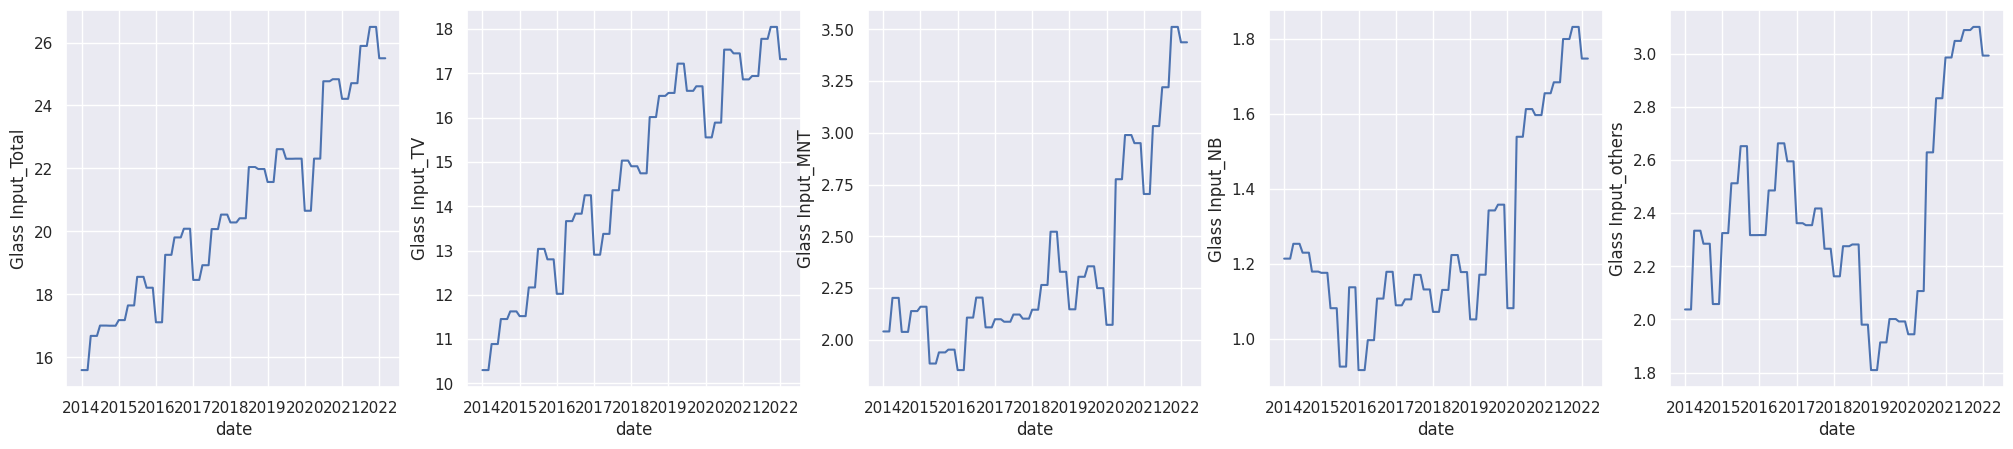

In [ ]:
fig = plt.figure(figsize = (25,5))
sns.set(style='darkgrid')

ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)


sns.lineplot(x='date', y='Glass Input_Total',data=df,ax=ax1)
sns.lineplot(x='date', y='Glass Input_TV',data=df,ax=ax2)
sns.lineplot(x='date', y='Glass Input_MNT',data=df,ax=ax3)
sns.lineplot(x='date', y='Glass Input_NB',data=df,ax=ax4)
sns.lineplot(x='date', y='Glass Input_others',data=df,ax=ax5)

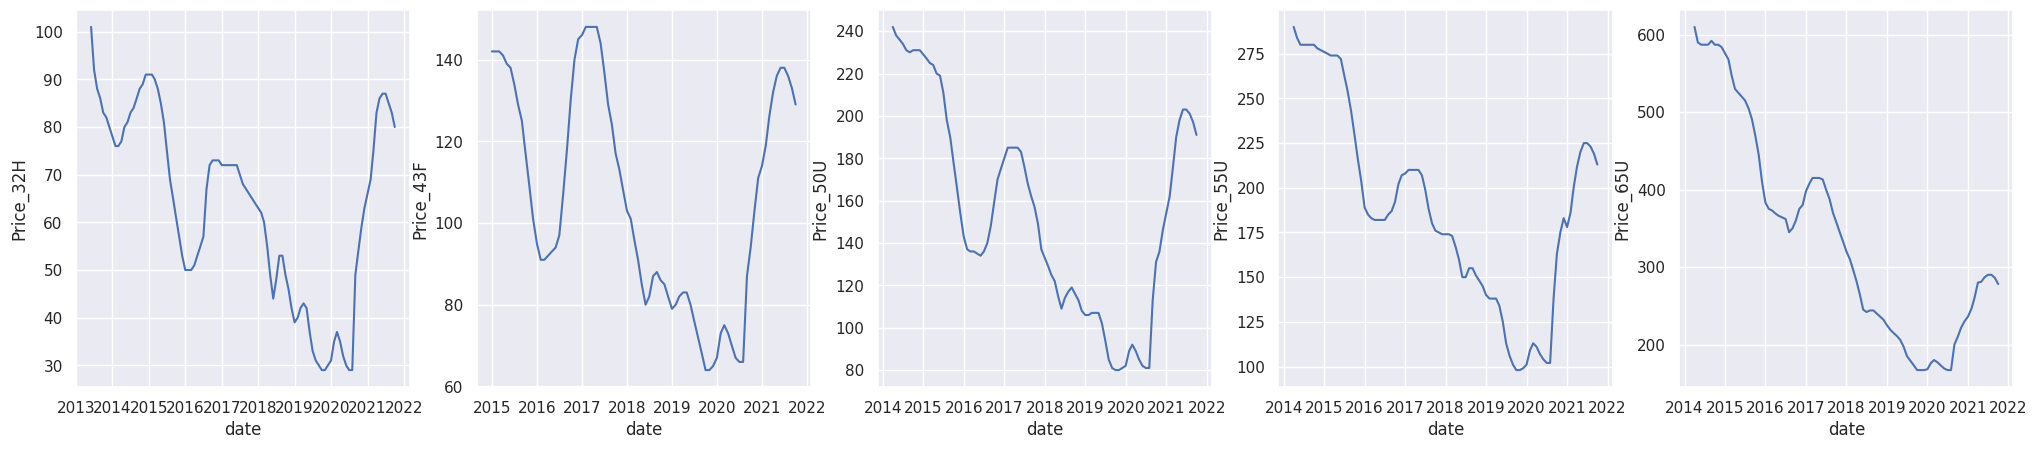

In [ ]:
fig = plt.figure(figsize = (25,5))
sns.set(style='darkgrid')

ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)


sns.lineplot(x='date', y='Price_32H',data=df,ax=ax1)
sns.lineplot(x='date', y='Price_43F',data=df,ax=ax2)
sns.lineplot(x='date', y='Price_50U',data=df,ax=ax3)
sns.lineplot(x='date', y='Price_55U',data=df,ax=ax4)
sns.lineplot(x='date', y='Price_65U',data=df,ax=ax5)

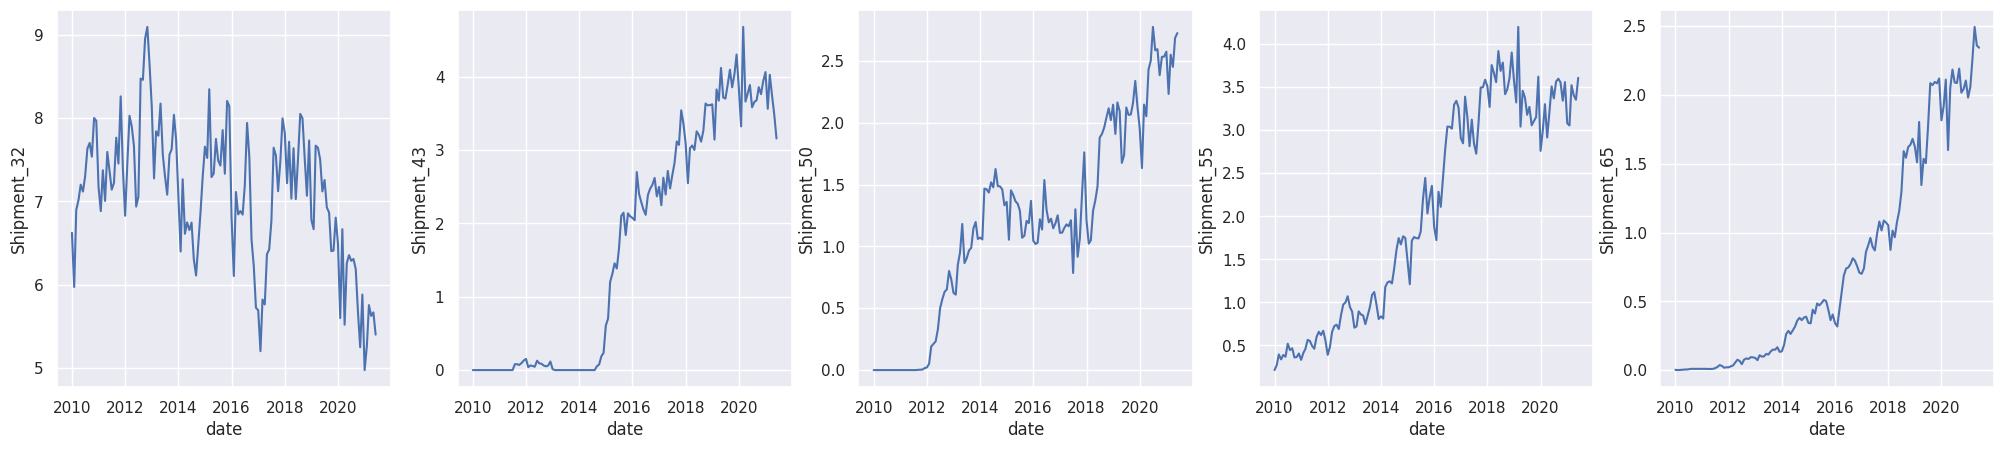

In [ ]:
fig = plt.figure(figsize = (25,5))
sns.set(style='darkgrid')

ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)


sns.lineplot(x='date', y='Shipment_32',data=df,ax=ax1)
sns.lineplot(x='date', y='Shipment_43',data=df,ax=ax2)
sns.lineplot(x='date', y='Shipment_50',data=df,ax=ax3)
sns.lineplot(x='date', y='Shipment_55',data=df,ax=ax4)
sns.lineplot(x='date', y='Shipment_65',data=df,ax=ax5)

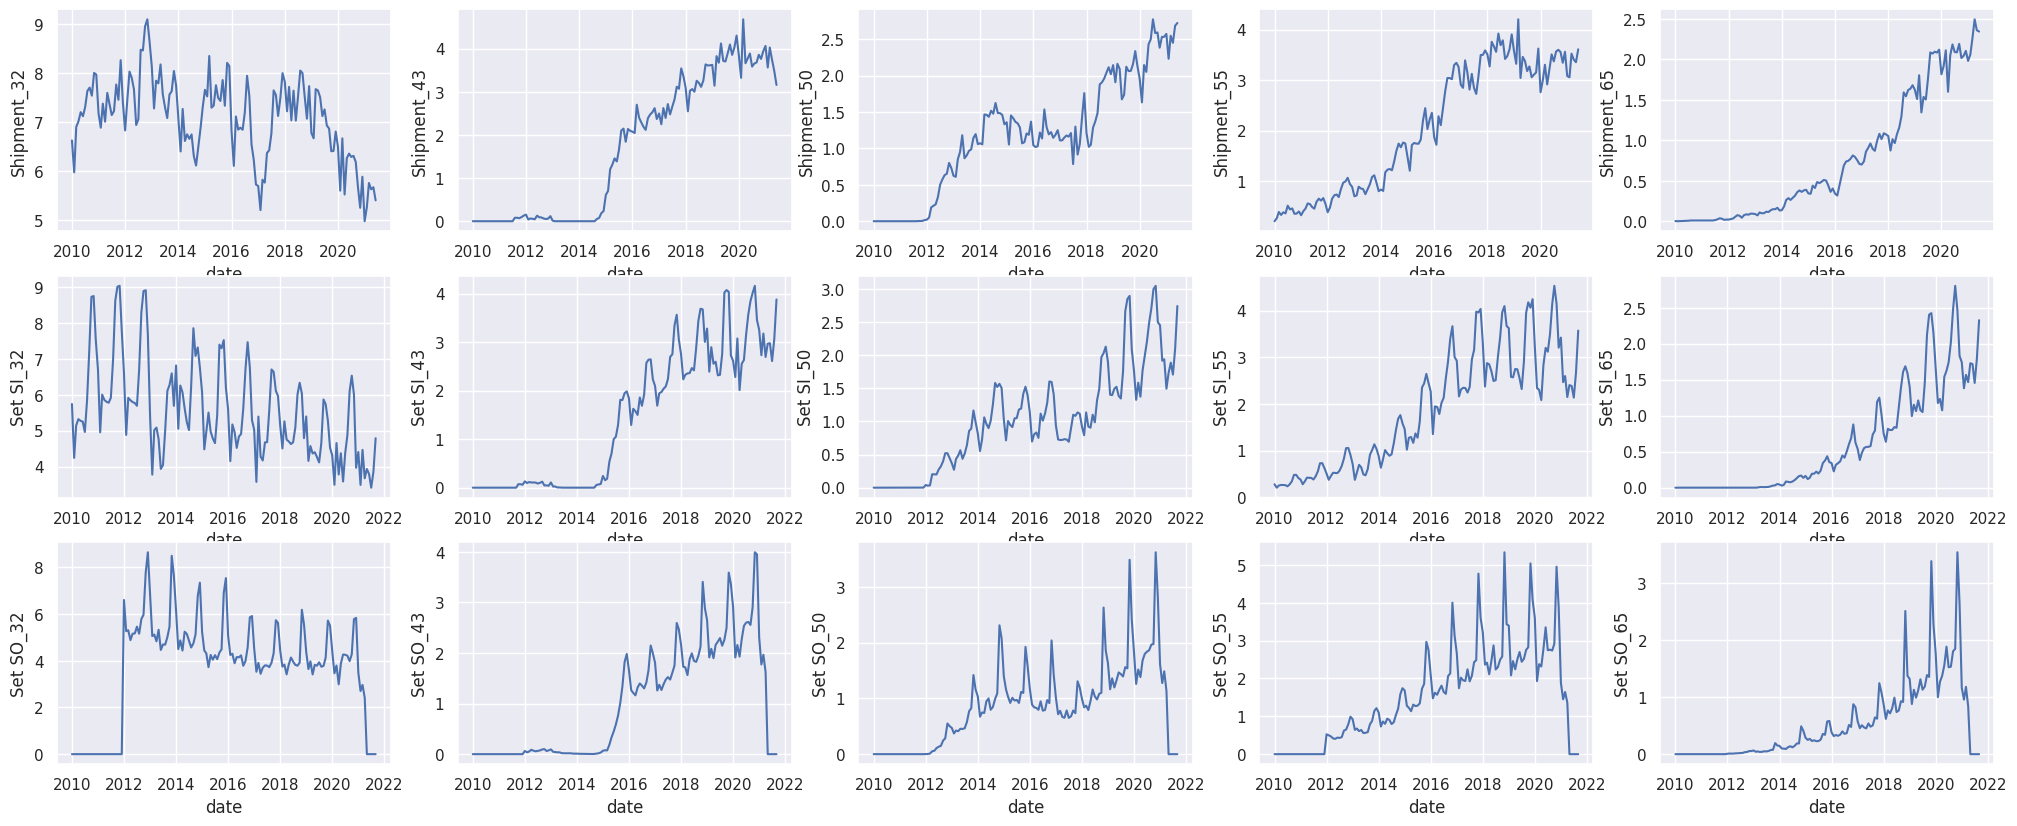

In [ ]:
fig = plt.figure(figsize = (25,10))
sns.set(style='darkgrid')

ax1 = fig.add_subplot(3,5,1)
ax2 = fig.add_subplot(3,5,2)
ax3 = fig.add_subplot(3,5,3)
ax4 = fig.add_subplot(3,5,4)
ax5 = fig.add_subplot(3,5,5)
ax6 = fig.add_subplot(3,5,6)
ax7 = fig.add_subplot(3,5,7)
ax8 = fig.add_subplot(3,5,8)
ax9 = fig.add_subplot(3,5,9)
ax10 = fig.add_subplot(3,5,10)
ax11 = fig.add_subplot(3,5,11)
ax12 = fig.add_subplot(3,5,12)
ax13 = fig.add_subplot(3,5,13)
ax14 = fig.add_subplot(3,5,14)
ax15 = fig.add_subplot(3,5,15)

sns.lineplot(x='date', y='Shipment_32',data=df,ax=ax1)
sns.lineplot(x='date', y='Shipment_43',data=df,ax=ax2)
sns.lineplot(x='date', y='Shipment_50',data=df,ax=ax3)
sns.lineplot(x='date', y='Shipment_55',data=df,ax=ax4)
sns.lineplot(x='date', y='Shipment_65',data=df,ax=ax5)
sns.lineplot(x='date', y='Set SI_32',data=df,ax=ax6)
sns.lineplot(x='date', y='Set SI_43',data=df,ax=ax7)
sns.lineplot(x='date', y='Set SI_50',data=df,ax=ax8)
sns.lineplot(x='date', y='Set SI_55',data=df,ax=ax9)
sns.lineplot(x='date', y='Set SI_65',data=df,ax=ax10)
sns.lineplot(x='date', y='Set SO_32',data=df,ax=ax11)
sns.lineplot(x='date', y='Set SO_43',data=df,ax=ax12)
sns.lineplot(x='date', y='Set SO_50',data=df,ax=ax13)
sns.lineplot(x='date', y='Set SO_55',data=df,ax=ax14)
sns.lineplot(x='date', y='Set SO_65',data=df,ax=ax15)

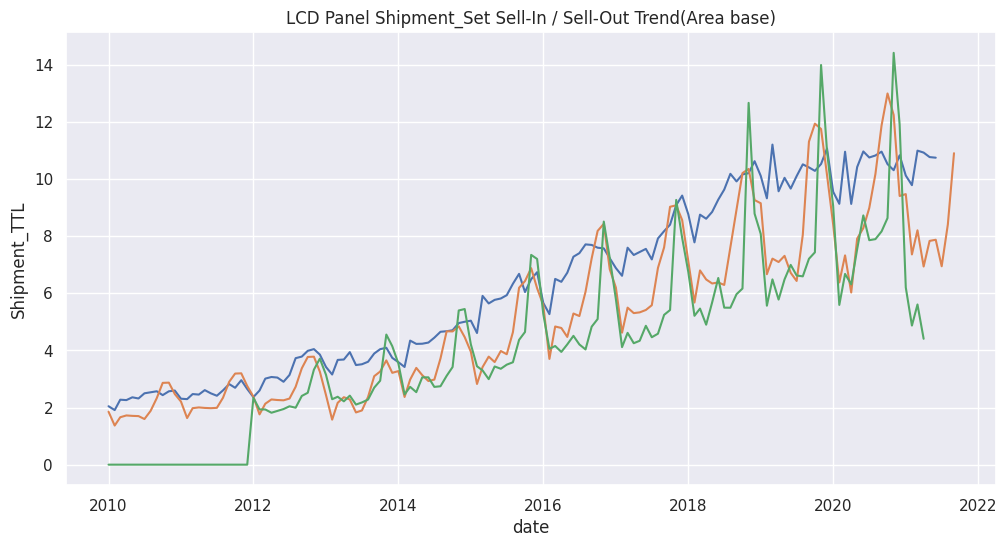

In [ ]:
sns.set(style='darkgrid')
sns.lineplot(data = df, x = 'date', y = 'Shipment_TTL')
sns.lineplot(data = df, x = 'date', y = 'SET SI TTL')
sns.lineplot(data = df, x = 'date', y = 'Set SO TTL')
plt.title('LCD Panel Shipment_Set Sell-In / Sell-Out Trend(Area base)')
plt.show()

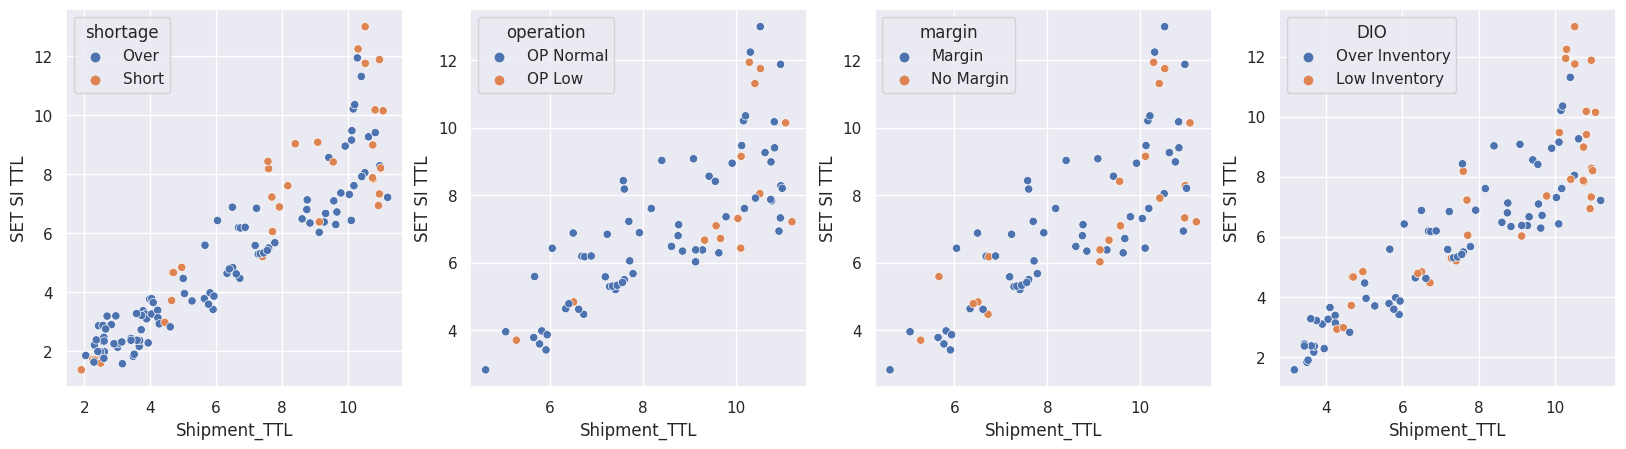

In [ ]:
fig = plt.figure(figsize = (20,5))
sns.set(style='darkgrid')

ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)


sns.scatterplot(x='Shipment_TTL', y='SET SI TTL', hue='shortage', data=df,ax=ax1)
sns.scatterplot(x='Shipment_TTL', y='SET SI TTL', hue='operation', data=df,ax=ax2)
sns.scatterplot(x='Shipment_TTL', y='SET SI TTL', hue='margin', data=df,ax=ax3)
sns.scatterplot(x='Shipment_TTL', y='SET SI TTL', hue='DIO', data=df,ax=ax4)

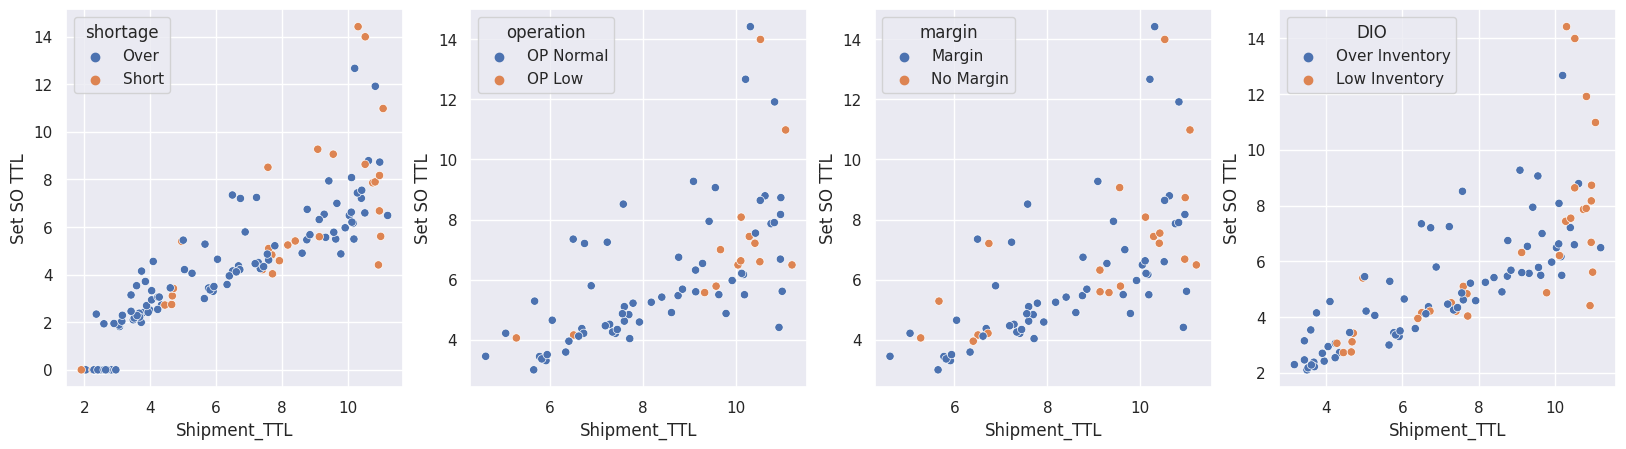

In [ ]:
fig = plt.figure(figsize = (20,5))
sns.set(style='darkgrid')

ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)


sns.scatterplot(x='Shipment_TTL', y='Set SO TTL', hue='shortage', data=df,ax=ax1)
sns.scatterplot(x='Shipment_TTL', y='Set SO TTL', hue='operation', data=df,ax=ax2)
sns.scatterplot(x='Shipment_TTL', y='Set SO TTL', hue='margin', data=df,ax=ax3)
sns.scatterplot(x='Shipment_TTL', y='Set SO TTL', hue='DIO', data=df,ax=ax4)

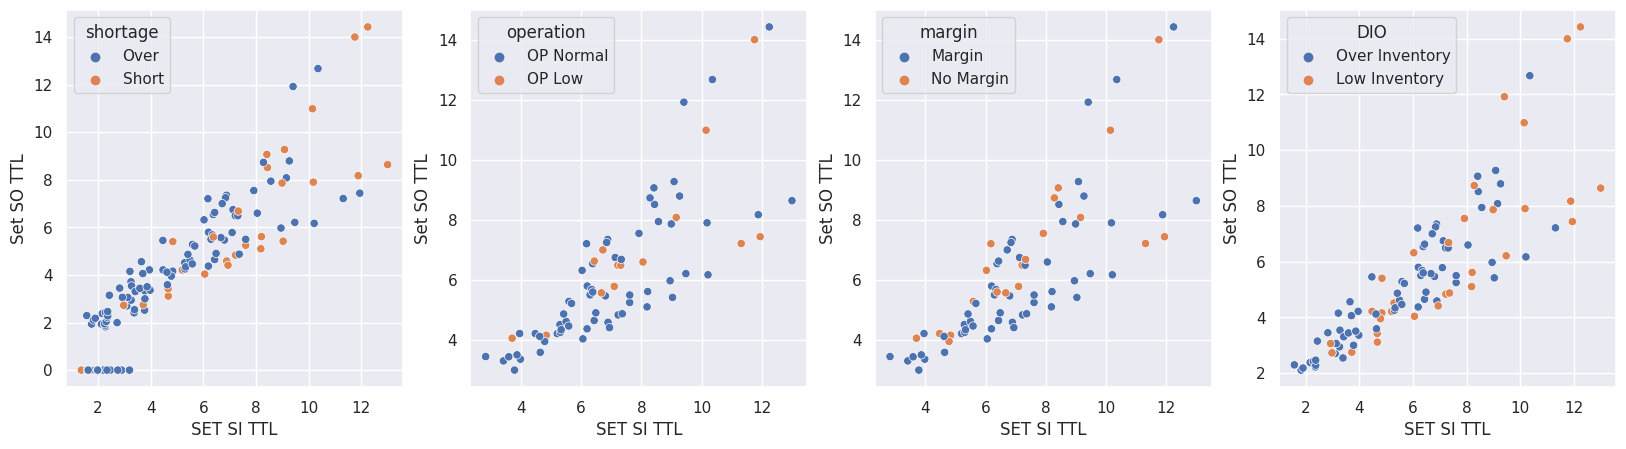

In [ ]:
fig = plt.figure(figsize = (20,5))
sns.set(style='darkgrid')

ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)


sns.scatterplot(x='SET SI TTL', y='Set SO TTL', hue='shortage', data=df,ax=ax1)
sns.scatterplot(x='SET SI TTL', y='Set SO TTL', hue='operation', data=df,ax=ax2)
sns.scatterplot(x='SET SI TTL', y='Set SO TTL', hue='margin', data=df,ax=ax3)
sns.scatterplot(x='SET SI TTL', y='Set SO TTL', hue='DIO', data=df,ax=ax4)

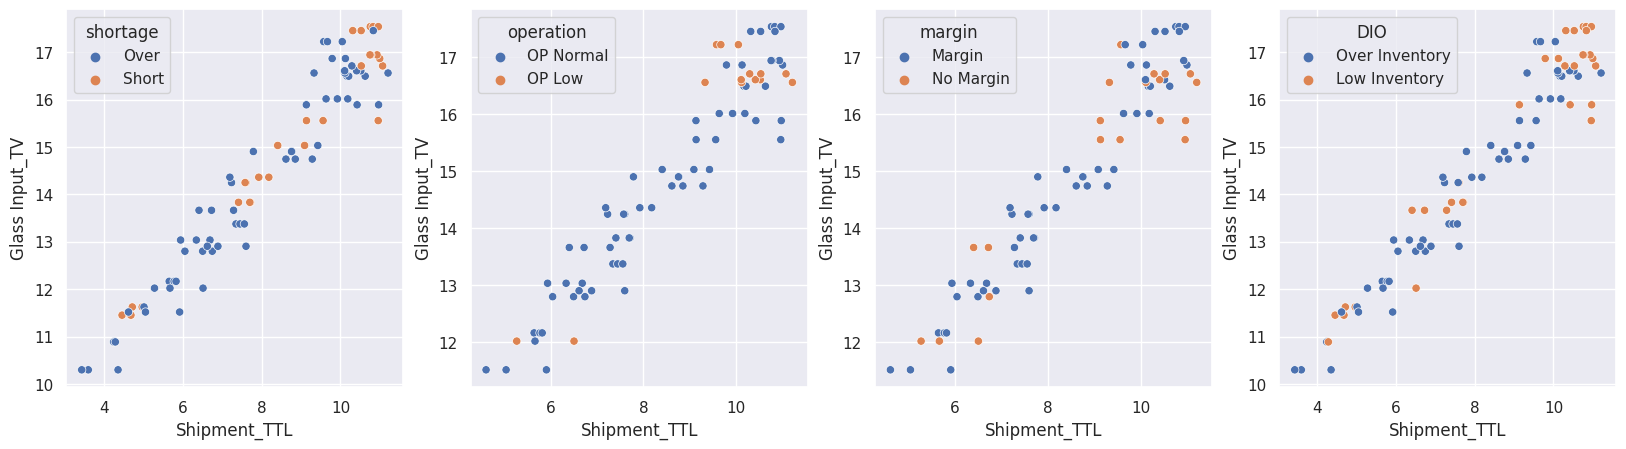

In [ ]:
fig = plt.figure(figsize = (20,5))
sns.set(style='darkgrid')

ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)


sns.scatterplot(x='Shipment_TTL', y='Glass Input_TV', hue='shortage', data=df,ax=ax1)
sns.scatterplot(x='Shipment_TTL', y='Glass Input_TV', hue='operation', data=df,ax=ax2)
sns.scatterplot(x='Shipment_TTL', y='Glass Input_TV', hue='margin', data=df,ax=ax3)
sns.scatterplot(x='Shipment_TTL', y='Glass Input_TV', hue='DIO', data=df,ax=ax4)

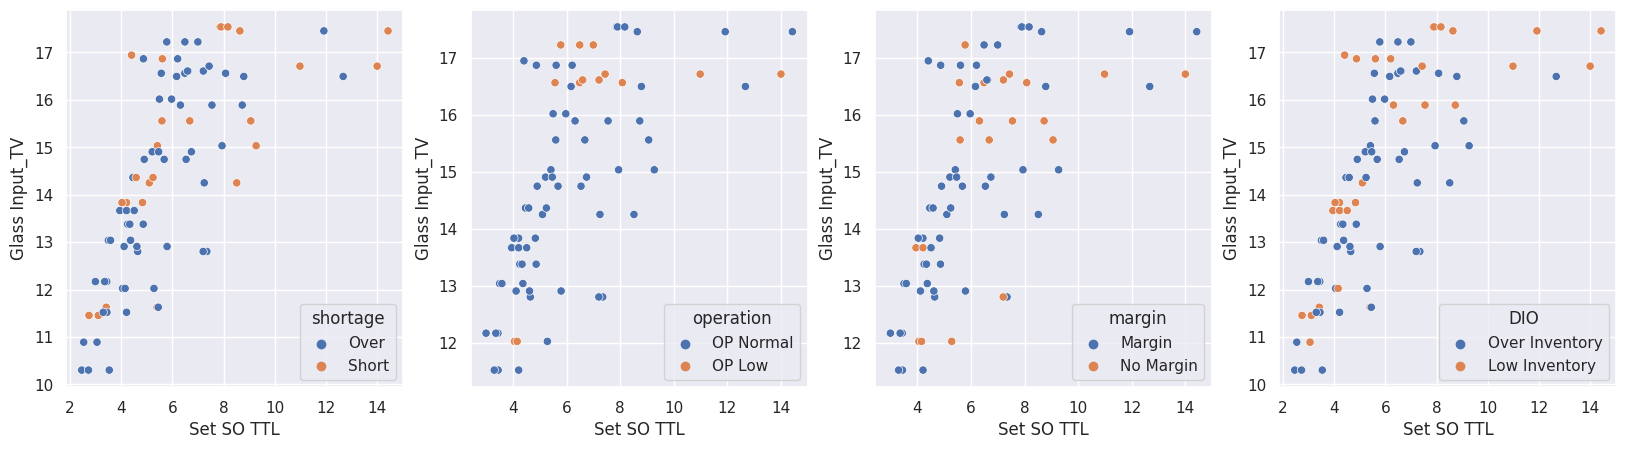

In [ ]:
fig = plt.figure(figsize = (20,5))
sns.set(style='darkgrid')

ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)


sns.scatterplot(x='Set SO TTL', y='Glass Input_TV', hue='shortage', data=df,ax=ax1)
sns.scatterplot(x='Set SO TTL', y='Glass Input_TV', hue='operation', data=df,ax=ax2)
sns.scatterplot(x='Set SO TTL', y='Glass Input_TV', hue='margin', data=df,ax=ax3)
sns.scatterplot(x='Set SO TTL', y='Glass Input_TV', hue='DIO', data=df,ax=ax4)

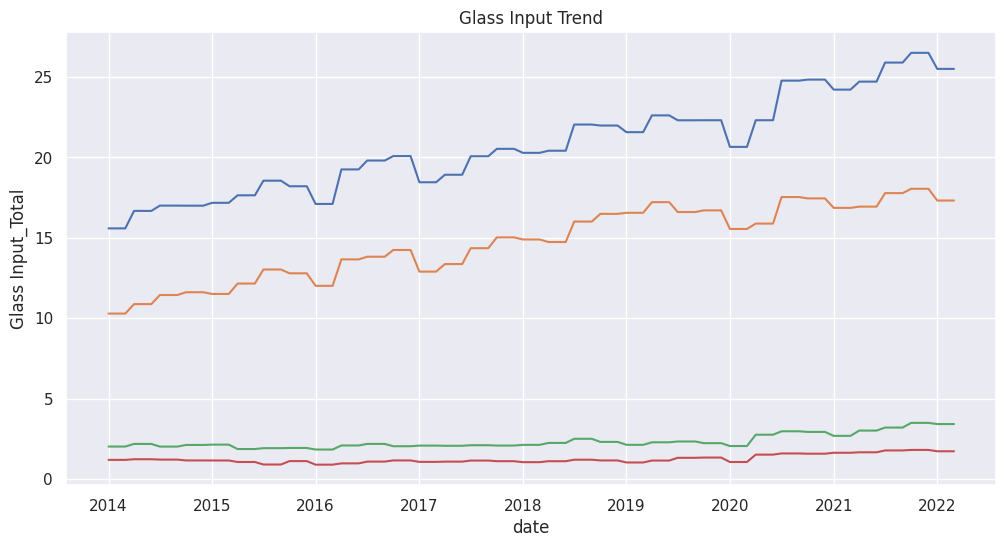

In [ ]:
sns.set(style='darkgrid')
sns.lineplot(data = df, x = 'date', y = 'Glass Input_Total')
sns.lineplot(data = df, x = 'date', y = 'Glass Input_TV')
sns.lineplot(data = df, x = 'date', y = 'Glass Input_MNT')
sns.lineplot(data = df, x = 'date', y = 'Glass Input_NB')
plt.title('Glass Input Trend')
plt.show()

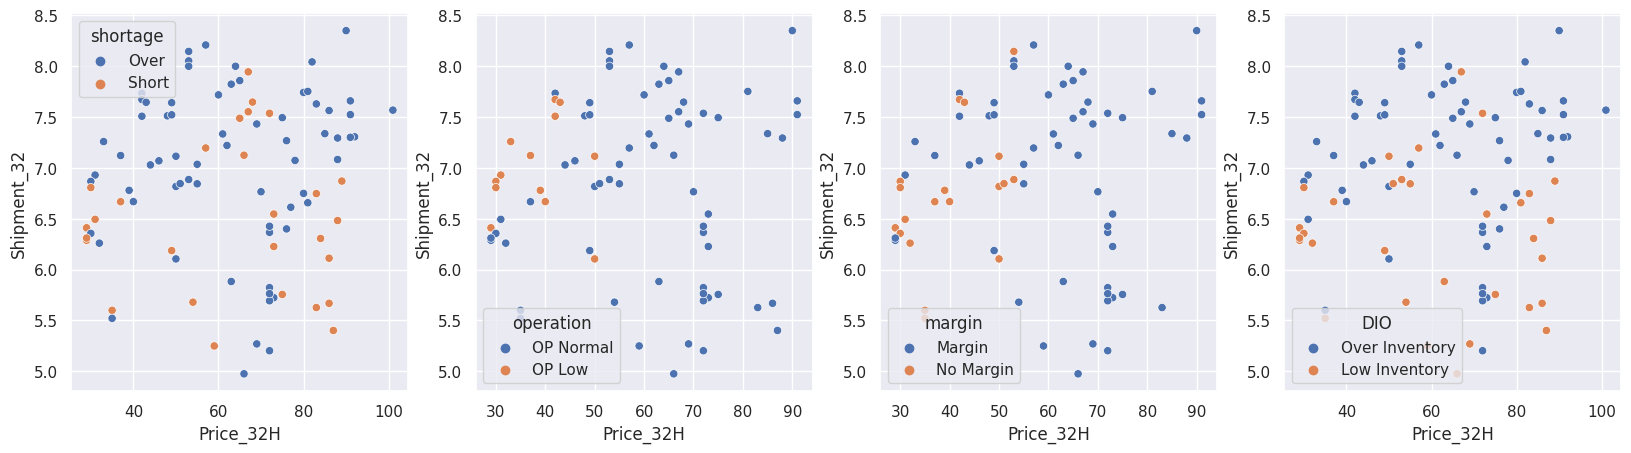

In [ ]:
fig = plt.figure(figsize = (20,5))
sns.set(style='darkgrid')

ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)


sns.scatterplot(x='Price_32H', y='Shipment_32', hue='shortage', data=df,ax=ax1)
sns.scatterplot(x='Price_32H', y='Shipment_32', hue='operation', data=df,ax=ax2)
sns.scatterplot(x='Price_32H', y='Shipment_32', hue='margin', data=df,ax=ax3)
sns.scatterplot(x='Price_32H', y='Shipment_32', hue='DIO', data=df,ax=ax4)

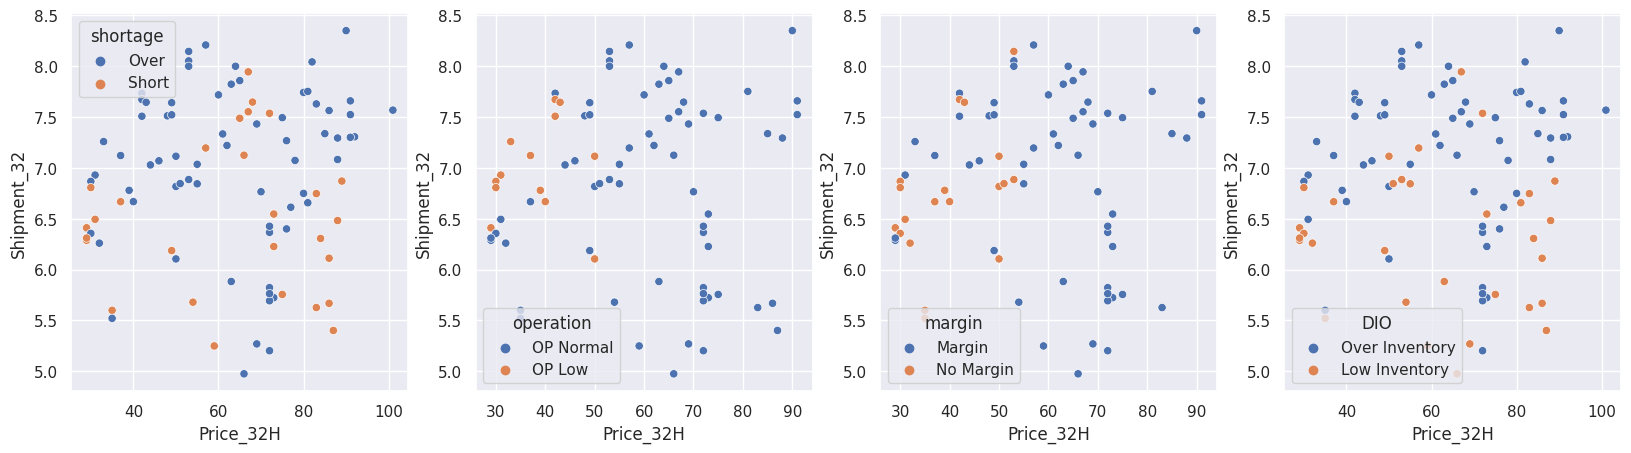

In [ ]:
fig = plt.figure(figsize = (20,5))
sns.set(style='darkgrid')

ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)


sns.scatterplot(x='Price_32H', y='Shipment_32', hue='shortage', data=df,ax=ax1)
sns.scatterplot(x='Price_32H', y='Shipment_32', hue='operation', data=df,ax=ax2)
sns.scatterplot(x='Price_32H', y='Shipment_32', hue='margin', data=df,ax=ax3)
sns.scatterplot(x='Price_32H', y='Shipment_32', hue='DIO', data=df,ax=ax4)

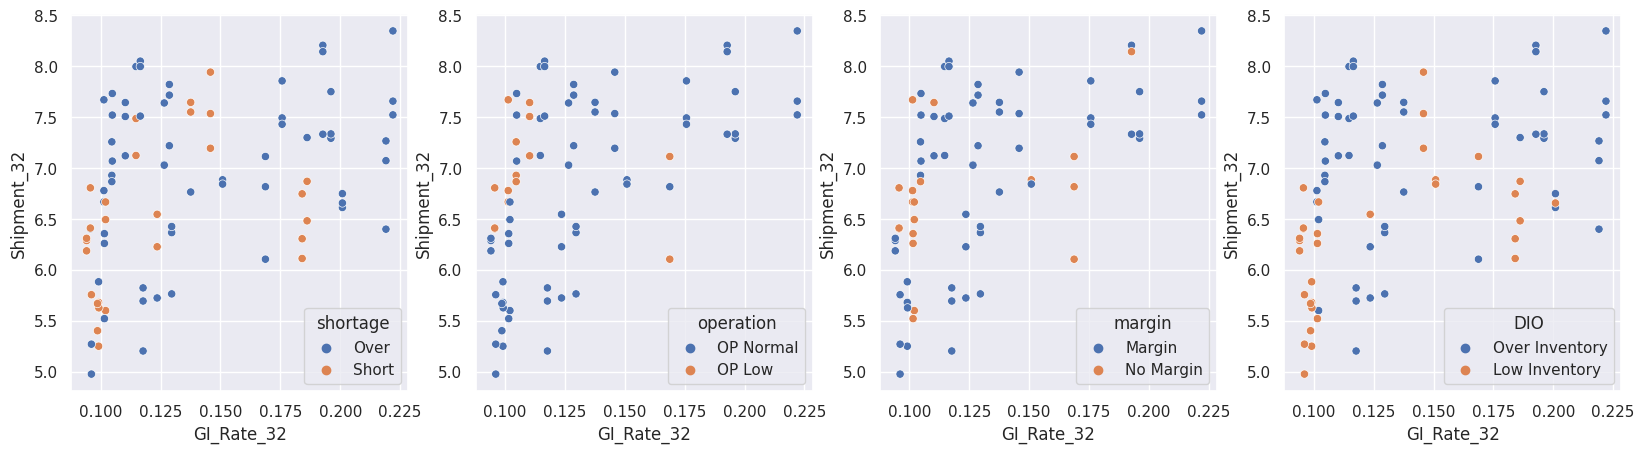

In [ ]:
fig = plt.figure(figsize = (20,5))
sns.set(style='darkgrid')

ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)


sns.scatterplot(x='GI_Rate_32', y='Shipment_32', hue='shortage', data=df,ax=ax1)
sns.scatterplot(x='GI_Rate_32', y='Shipment_32', hue='operation', data=df,ax=ax2)
sns.scatterplot(x='GI_Rate_32', y='Shipment_32', hue='margin', data=df,ax=ax3)
sns.scatterplot(x='GI_Rate_32', y='Shipment_32', hue='DIO', data=df,ax=ax4)

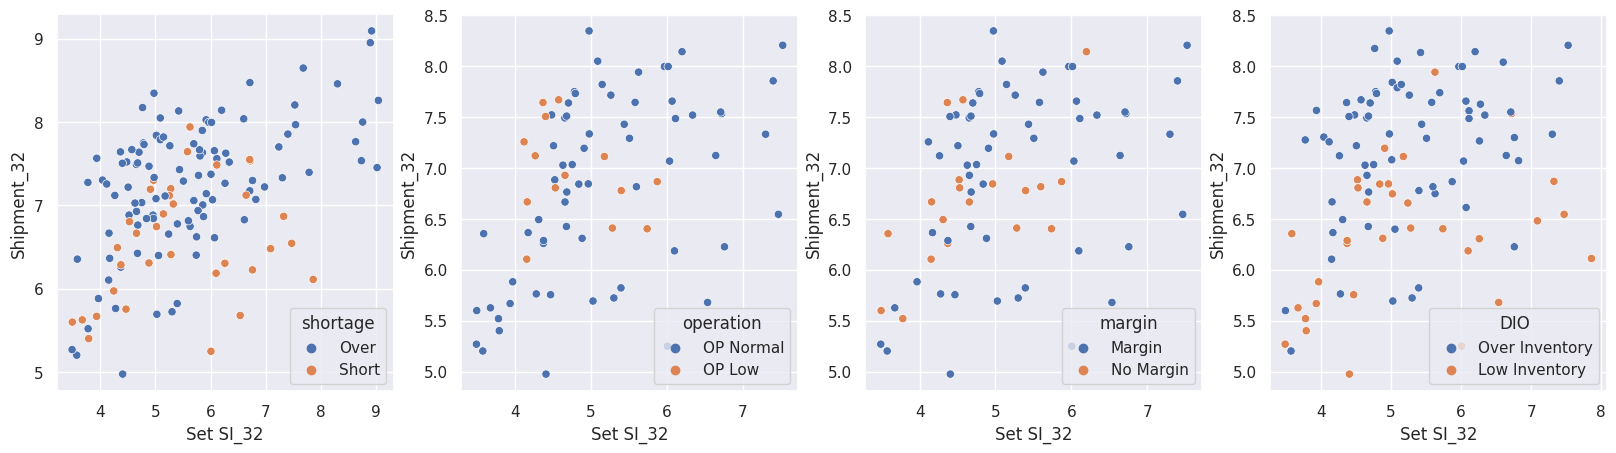

In [ ]:
fig = plt.figure(figsize = (20,5))
sns.set(style='darkgrid')

ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)


sns.scatterplot(x='Set SI_32', y='Shipment_32', hue='shortage', data=df,ax=ax1)
sns.scatterplot(x='Set SI_32', y='Shipment_32', hue='operation', data=df,ax=ax2)
sns.scatterplot(x='Set SI_32', y='Shipment_32', hue='margin', data=df,ax=ax3)
sns.scatterplot(x='Set SI_32', y='Shipment_32', hue='DIO', data=df,ax=ax4)

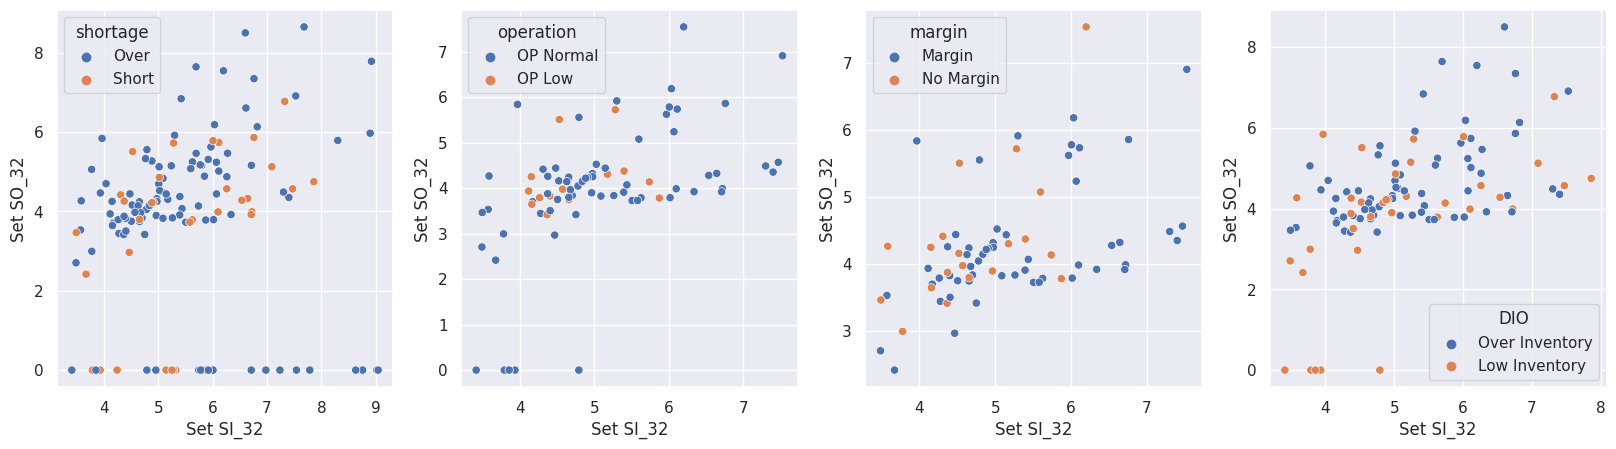

In [ ]:
fig = plt.figure(figsize = (20,5))
sns.set(style='darkgrid')

ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)


sns.scatterplot(x='Set SI_32', y='Set SO_32', hue='shortage', data=df,ax=ax1)
sns.scatterplot(x='Set SI_32', y='Set SO_32', hue='operation', data=df,ax=ax2)
sns.scatterplot(x='Set SI_32', y='Set SO_32', hue='margin', data=df,ax=ax3)
sns.scatterplot(x='Set SI_32', y='Set SO_32', hue='DIO', data=df,ax=ax4)

In [ ]:
#corr2 = lcd[['Price_32H','Price_43F','Price_50U','Price_55U','Price_65U']].corr(method = 'pearson')
#print(corr2)

In [ ]:
#lcd = df.loc[:,['Price_32H',          'Price_43F',         'Price_50U',         'Price_55U',         'Price_65U']]
#sns.pairplot(data = lcd, palette = 'Dark2')
#plt.show()


In [ ]:
#corr3 = lcd[['Price_32H','Price_43F','Price_50U','Price_55U','Price_65U']].corr(method = 'pearson')
#sns.set(font_scale = 1.0)
#hm = sns.heatmap(corr3.values, cbar = True, annot = True, square = True, fmt = '2f',annot_kws = {'size':10},
#                 yticklabels = corr3,xticklabels = corr3 )
#plt.tight_layout()
#plt.show()

In [ ]:
# 인치별 가격-선적 수량 - 수급 - DIO간 상관관계 분석 
#['32H Price','32 Set Sell-In','32 Shipment','32 Set Sell-Out','Glut Level', 'TV Cell DIO']
#['43F Price','43 Set Sell-In','43 Shipment','43 Set Sell-Out','Glut Level', 'TV Cell DIO']
#['50U Price','50 Set Sell-In','50 Shipment','50 Set Sell-Out','Glut Level', 'TV Cell DIO']
#['55U Price','55 Set Sell-In','55 Shipment','55 Set Sell-Out','Glut Level', 'TV Cell DIO']
#['65U Price','65 Set Sell-In','65 Shipment','65 Set Sell-Out','Glut Level', 'TV Cell DIO']

corr2 = lcd[['32H Price','32 Set Sell-In','32 Shipment','32 Set Sell-Out','Glut Level', 'TV Cell DIO']].corr(method = 'pearson')
print(corr2)

corr3 = ['32H Price','32 Set Sell-In','32 Shipment','32 Set Sell-Out','Glut Level', 'TV Cell DIO']
sns.set(font_scale = 1.0)
hm = sns.heatmap(corr2.values, cbar = True, annot = True, square = True, fmt = '2f',annot_kws = {'size':10},
                 yticklabels = corr3,xticklabels = corr3 )
plt.tight_layout()
plt.show()

NameError: ignored

In [ ]:
# 인치별 가격-선적 수량 - 수급 - DIO간 상관관계 분석 
#['32H Price','32 Set Sell-In','32 Shipment','32 Set Sell-Out','Glut Level', 'TV Cell DIO']
#['43F Price','43 Set Sell-In','43 Shipment','43 Set Sell-Out','Glut Level', 'TV Cell DIO']
#['50U Price','50 Set Sell-In','50 Shipment','50 Set Sell-Out','Glut Level', 'TV Cell DIO']
#['55U Price','55 Set Sell-In','55 Shipment','55 Set Sell-Out','Glut Level', 'TV Cell DIO']
#['65U Price','65 Set Sell-In','65 Shipment','65 Set Sell-Out','Glut Level', 'TV Cell DIO']

corr2 = lcd[['43F Price','43 Set Sell-In','43 Shipment','43 Set Sell-Out','Glut Level', 'TV Cell DIO']].corr(method = 'pearson')
print(corr2)

corr3 = ['43F Price','43 Set Sell-In','43 Shipment','43 Set Sell-Out','Glut Level', 'TV Cell DIO']
sns.set(font_scale = 1.0)
hm = sns.heatmap(corr2.values, cbar = True, annot = True, square = True, fmt = '2f',annot_kws = {'size':10},
                 yticklabels = corr3,xticklabels = corr3 )
plt.tight_layout()
plt.show()

In [ ]:
# 인치별 가격-선적 수량 - 수급 - DIO간 상관관계 분석 
#['32H Price','32 Set Sell-In','32 Shipment','32 Set Sell-Out','Glut Level', 'TV Cell DIO']
#['43F Price','43 Set Sell-In','43 Shipment','43 Set Sell-Out','Glut Level', 'TV Cell DIO']
#['50U Price','50 Set Sell-In','50 Shipment','50 Set Sell-Out','Glut Level', 'TV Cell DIO']
#['55U Price','55 Set Sell-In','55 Shipment','55 Set Sell-Out','Glut Level', 'TV Cell DIO']
#['65U Price','65 Set Sell-In','65 Shipment','65 Set Sell-Out','Glut Level', 'TV Cell DIO']

corr2 = lcd[['50U Price','50 Set Sell-In','50 Shipment','50 Set Sell-Out','Glut Level', 'TV Cell DIO']].corr(method = 'pearson')
print(corr2)

corr3 = ['50U Price','50 Set Sell-In','50 Shipment','50 Set Sell-Out','Glut Level', 'TV Cell DIO']
sns.set(font_scale = 1.0)
hm = sns.heatmap(corr2.values, cbar = True, annot = True, square = True, fmt = '2f',annot_kws = {'size':10},
                 yticklabels = corr3,xticklabels = corr3 )
plt.tight_layout()
plt.show()

In [ ]:
# 인치별 가격-선적 수량 - 수급 - DIO간 상관관계 분석 
#['32H Price','32 Set Sell-In','32 Shipment','32 Set Sell-Out','Glut Level', 'TV Cell DIO']
#['43F Price','43 Set Sell-In','43 Shipment','43 Set Sell-Out','Glut Level', 'TV Cell DIO']
#['50U Price','50 Set Sell-In','50 Shipment','50 Set Sell-Out','Glut Level', 'TV Cell DIO']
#['55U Price','55 Set Sell-In','55 Shipment','55 Set Sell-Out','Glut Level', 'TV Cell DIO']
#['65U Price','65 Set Sell-In','65 Shipment','65 Set Sell-Out','Glut Level', 'TV Cell DIO']

corr2 = lcd[['55U Price','55 Set Sell-In','55 Shipment','55 Set Sell-Out','Glut Level', 'TV Cell DIO']].corr(method = 'pearson')
print(corr2)

corr3 = ['55U Price','55 Set Sell-In','55 Shipment','55 Set Sell-Out','Glut Level', 'TV Cell DIO']
sns.set(font_scale = 1.0)
hm = sns.heatmap(corr2.values, cbar = True, annot = True, square = True, fmt = '2f',annot_kws = {'size':10},
                 yticklabels = corr3,xticklabels = corr3 )
plt.tight_layout()
plt.show()

In [ ]:
# 인치별 가격-선적 수량 - 수급 - DIO간 상관관계 분석 
#['32H Price','32 Set Sell-In','32 Shipment','32 Set Sell-Out','Glut Level', 'TV Cell DIO']
#['43F Price','43 Set Sell-In','43 Shipment','43 Set Sell-Out','Glut Level', 'TV Cell DIO']
#['50U Price','50 Set Sell-In','50 Shipment','50 Set Sell-Out','Glut Level', 'TV Cell DIO']
#['55U Price','55 Set Sell-In','55 Shipment','55 Set Sell-Out','Glut Level', 'TV Cell DIO']
#['65U Price','65 Set Sell-In','65 Shipment','65 Set Sell-Out','Glut Level', 'TV Cell DIO']

corr2 = lcd[['65U Price','65 Set Sell-In','65 Shipment','65 Set Sell-Out','Glut Level', 'TV Cell DIO']].corr(method = 'pearson')
print(corr2)

corr3 = ['65U Price','65 Set Sell-In','65 Shipment','65 Set Sell-Out','Glut Level', 'TV Cell DIO']
sns.set(font_scale = 1.0)
hm = sns.heatmap(corr2.values, cbar = True, annot = True, square = True, fmt = '2f',annot_kws = {'size':10},
                 yticklabels = corr3,xticklabels = corr3 )
plt.tight_layout()
plt.show()

In [ ]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(lcd[['32H Price', 
         '32 Set Sell-In',
         '32 Shipment',
         '32 Set Sell-Out',
         'Glut Level', 
         'TV Cell DIO']],height =2.5)
plt.show()

In [ ]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(lcd[['43F Price', 
         '43 Set Sell-In',
         '43 Shipment',
         '43 Set Sell-Out',
         'Glut Level', 
         'TV Cell DIO']],height =2.5)
plt.show()

In [ ]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(lcd[['50U Price', 
         '50 Set Sell-In',
         '50 Shipment',
         '50 Set Sell-Out',
         'Glut Level', 
         'TV Cell DIO']],height =2.5)
plt.show()

In [ ]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(lcd[['55U Price', 
         '55 Set Sell-In',
         '55 Shipment',
         '55 Set Sell-Out',
         'Glut Level', 
         'TV Cell DIO']],height =2.5)
plt.show()

In [ ]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(lcd[['65U Price', 
         '65 Set Sell-In',
         '65 Shipment',
         '65 Set Sell-Out',
         'Glut Level', 
         'TV Cell DIO']],height =2.5)
plt.show()

In [ ]:
# 타 사이즈 동종 변수간 상관관계 분석 - Price

corr2 = lcd[['32 Shipment','43 Shipment', '50 Shipment' , '55 Shipment', '65 Shipment,'Glut Level', TV Cell DIO']].corr(method = 'pearson')
print(corr2)

corr3 = ['32 Shipment','43 Shipment', '50 Shipment' , '55 Shipment', '65 Shipment,'Glut Level', TV Cell DIO']
sns.set(font_scale = 1.0)
hm = sns.heatmap(corr2.values, cbar = True, annot = True, square = True, fmt = '2f',annot_kws = {'size':10},
                 yticklabels = corr3,xticklabels = corr3 )
plt.tight_layout()
plt.show()

In [ ]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(lcd[['32H Price','43F Price', '50U Price' , '55U Price', '65U Price','Glut Level', 'TV Cell DIO']],height =2.5)
plt.show()

In [ ]:
# 타 사이즈 동종 변수간 상관관계 분석 - Cell shipment

corr2 = lcd[['32 Shipment','43 Shipment','50 Shipment','55 Shipment','65 Shipment','Glut Level', 'TV Cell DIO']].corr(method = 'pearson')
print(corr2)

corr3 = ['32 Shipment','43 Shipment', '50 Shipment' , '55 Shipment', '65 Shipment','Glut Level', 'TV Cell DIO']
sns.set(font_scale = 1.0)
hm = sns.heatmap(corr2.values, cbar = True, annot = True, square = True, fmt = '2f',annot_kws = {'size':10},
                 yticklabels = corr3,xticklabels = corr3 )
plt.tight_layout()
plt.show()

In [ ]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(lcd[['32 Shipment','43 Shipment','50 Shipment','55 Shipment','65 Shipment','Glut Level', 'TV Cell DIO']],height =2.5)
plt.show()

In [ ]:
# 타 사이즈 동종 변수간 상관관계 분석 - Sell -In



corr2 = lcd[['32 Set Sell-In','43 Set Sell-In','50 Set Sell-In','55 Set Sell-In','65 Set Sell-In','Glut Level', 'TV Cell DIO']].corr(method = 'pearson')
print(corr2)

corr3 = ['32 Set Sell-In','43 Set Sell-In','50 Set Sell-In','55 Set Sell-In','65 Set Sell-In','Glut Level', 'TV Cell DIO']
sns.set(font_scale = 1.0)
hm = sns.heatmap(corr2.values, cbar = True, annot = True, square = True, fmt = '2f',annot_kws = {'size':10},
                 yticklabels = corr3,xticklabels = corr3 )
plt.tight_layout()
plt.show()

In [ ]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(lcd[['32 Set Sell-In','43 Set Sell-In','50 Set Sell-In','55 Set Sell-In','65 Set Sell-In','Glut Level', 'TV Cell DIO']],height =2.5)
plt.show()

In [ ]:
corr2 = lcd[['32 Set Sell-Out','43 Set Sell-Out','50 Set Sell-Out','55 Set Sell-Out','65 Set Sell-Out','Glut Level', 'TV Cell DIO']].corr(method = 'pearson')
print(corr2)

corr3 = ['32 Set Sell-Out','43 Set Sell-Out','50 Set Sell-Out','55 Set Sell-Out','65 Set Sell-Out','Glut Level', 'TV Cell DIO']
sns.set(font_scale = 1.0)
hm = sns.heatmap(corr2.values, cbar = True, annot = True, square = True, fmt = '2f',annot_kws = {'size':10},
                 yticklabels = corr3,xticklabels = corr3 )
plt.tight_layout()
plt.show()

sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(lcd[['32 Set Sell-Out','43 Set Sell-Out','50 Set Sell-Out','55 Set Sell-Out','65 Set Sell-Out','Glut Level', 'TV Cell DIO']],height =2.5)
plt.show()

In [ ]:
%mv C:/Users/sangho01.lee/Downloads/test